In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(file_path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(455, 30) (114, 30) (455,) (114,)


In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV            #  RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
pipe = make_pipeline(StandardScaler(),
                     SVC(random_state=1, C=10, kernel='rbf'))


In [6]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 3 39]]


Text(0, 0.5, 'Actual')

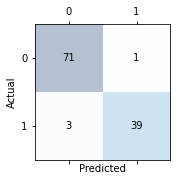

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(2.5, 2.5))
axes.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    axes.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Precision Recall F1

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision - ', precision_score(y_true=y_test, y_pred=y_pred))
print('Recall - ', recall_score(y_true=y_test, y_pred=y_pred))
print('F1 score - ', f1_score(y_true=y_test, y_pred=y_pred))

Precision -  0.975
Recall -  0.9285714285714286
F1 score -  0.951219512195122


# Receiver Operating Characteristic - ROC Curve
# Area Under Curve  -  AUC

In [28]:
from sklearn.metrics import roc_curve, auc
from numpy import interp                                  #  

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

In [15]:
pipe2 = make_pipeline(StandardScaler(),
                  PCA(n_components=2),
                  LogisticRegression(random_state=1, penalty='l2', solver='lbfgs', C=100.0))

In [26]:
X_train2 = X_train[:, [4,14]]
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

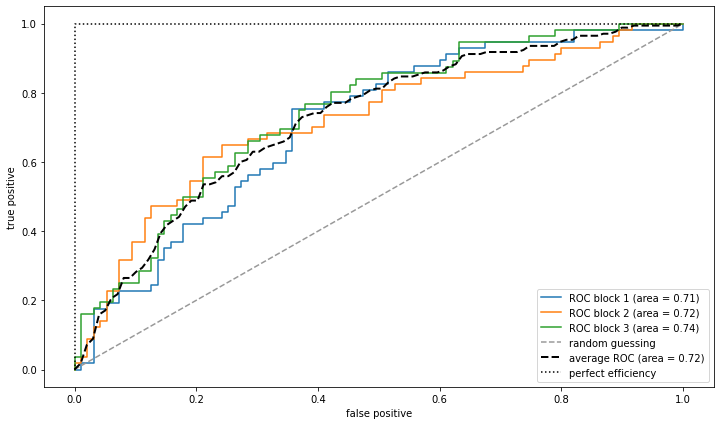

In [29]:
fig = plt.figure(figsize=(12,7))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []
for i, (train, test) in enumerate(cv):
  probas = pipe2.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
  fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1], pos_label=1)
  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label='ROC block %d (area = %.2f)' % (i+1, roc_auc))
plt.plot([0,1], [0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='average ROC (area = %.2f)' % mean_auc, lw=2)
plt.plot([0,0,1], [0,1,1], linestyle=':', color='black', label='perfect efficiency')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.legend(loc='lower right')